<a href="https://colab.research.google.com/github/DaffaElgo/PriceOptimization/blob/main/Copy_of_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sayur dan Buah

In [ ]:
import pandas as pd
import random
import datetime

In [ ]:
products = pd.read_excel("/content/Data-Sayur.xlsx",sheet_name='Data Fix')

In [ ]:
products

,Product Name,Price,Unit
0,Aiko Melon Premium,159800,1 Pcs
1,All Seasons Raspberry,119900,170 Gr
2,Alpukat Mentega Premium,74900,1 Kg
3,Alpukat Mentega Super,72900,1 Kg
4,Anggur Autum Crisps Hijau Peru,169900,1 Kg
...,...,...,...
209,Ubi Ungu Kupas Potong,22900,500 Gr
210,Wortel Baby Organik,15900,500 Gr
211,Wortel Brastagi,24900,1 Kg
212,Wortel Organik,14900,500 Gr


In [ ]:
products.head()

,Product Name,Price,Unit
0,Aiko Melon Premium,159800,1 Pcs
1,All Seasons Raspberry,119900,170 Gr
2,Alpukat Mentega Premium,74900,1 Kg
3,Alpukat Mentega Super,72900,1 Kg
4,Anggur Autum Crisps Hijau Peru,169900,1 Kg


In [ ]:
products_name = products['Product Name']

In [ ]:
products_name = products['Product Name'].tolist()

In [ ]:
products_name

['Aiko Melon Premium',
 'All Seasons Raspberry',
 'Alpukat Mentega Premium',
 'Alpukat Mentega Super',
 'Anggur Autum Crisps Hijau Peru',
 'Anggur Black Autumn',
 'Anggur Black Globe',
 'Anggur Black Sapphire',
 'Anggur Candy Snape',
 'Anggur Delaware Korea',
 'Anggur Great Green',
 'Anggur Green Ivory',
 'Anggur Hijau Sweet Globe',
 'Anggur Hijau Thompson',
 'Anggur Kyoho Korea',
 'Anggur Midnight Beauty',
 'Anggur Red Globe',
 'Apel Ambrosia',
 'Apel Envy Usa',
 'Apel Fuji',
 'Apel Fuji Blush',
 'Apel Fuji New Zealand',
 'Apel Fuji Wangshan',
 'Apel Grand Smith',
 'Apel Pacifik Rose',
 'Apel Red Delicious',
 'Apel Rockit Nz Tube',
 'Apel Royal Gala',
 'Apel Sunfuji Jepang',
 'Apel Venus Wangshan',
 'Arugula Organik',
 'Asparagus Natural',
 'Asparagus Organik',
 'Baby Aragula Organic',
 'Baby Kale Organic',
 'Baby Pakcoy Organik',
 'Baby Spinach Organik',
 'Bayam Hijau Hydroponik',
 'Bayam Hijau Organik',
 'Bayam Merah Hydroponik',
 'Bayam Merah Organik',
 'Beet Organik',
 'Belimbing 

   Transaction ID           Transaction Date             Product Purchased  \
0            1000 2023-10-03 22:10:16.989872                  Pear Packham   
1            1000 2023-10-03 22:10:16.989872            Jagung Ketan Merah   
2            1000 2023-10-03 22:10:16.989872  Highland Cherry Trust Tomato   
3            1000 2023-10-03 22:10:16.989872        Labu Siam Acar Organik   
4            1000 2023-10-03 22:10:16.989872                    Pisang Uli   

   Quantity  
0         1  
1         9  
2         9  
3         9  
4         1  


<Axes: title={'center': 'Daily Product Sales with Seasonal Effect'}, xlabel='Transaction Date'>

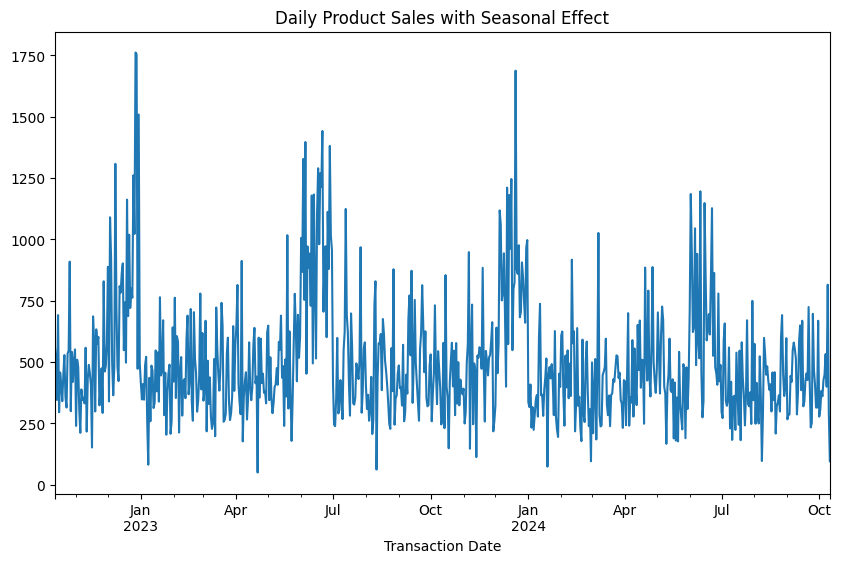

In [ ]:
import random
import datetime
import pandas as pd
import numpy as np

# Fungsi untuk generate tanggal acak dalam 2 tahun terakhir
def random_date(start, end):
    return start + datetime.timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

# Set rentang waktu 2 tahun
start_date = datetime.datetime.now() - datetime.timedelta(days=730)
end_date = datetime.datetime.now()

# Daftar produk
#products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E',
#            'Product F', 'Product G', 'Product H', 'Product I']

# Fungsi musiman dengan dua amplitudo yang berulang
def irregular_amplitude(t):
    amplitude1 = 1 + 0.5 * np.sin(2 * np.pi * (t / 4))  # Amplitudo 1 (setiap 4 unit waktu)
    amplitude2 = 1 + 0.5 * np.sin(np.pi * (t / 3))      # Amplitudo 2 (setiap 3 unit waktu)
    return np.sin(t) * amplitude1 * amplitude2          # Menggabungkan keduanya

# Definisikan waktu sebagai linspace
t = np.linspace(0, 20, 10000)  # Buat 10000 titik waktu untuk transaksi

# Buat daftar transaksi
data = []
transaction_id = 1000  # mulai dari Transaction ID 1000

for i in range(10000):  # contoh buat 10.000 transaksi
    # Generate random tanggal dan jam antara 9 pagi sampai 10 malam
    transaction_date = random_date(start_date, end_date)
    transaction_time = random.randint(9, 22)  # antara jam 9 sampai 22
    transaction_date = transaction_date.replace(hour=transaction_time, minute=random.randint(0, 59), second=random.randint(0, 59))

    # Pilih produk secara acak yang dibeli
    product_purchased = random.sample(products_name, random.randint(1, 9))  # setiap transaksi bisa beli 1-9 produk

    # Tambahkan kuantitas untuk setiap produk, dengan pengaruh musiman
    seasonal_factor = irregular_amplitude(t[i])  # Ambil faktor musiman berdasarkan waktu transaksi
    for product in product_purchased:
        if transaction_date.month in [6, 12]:  # Cek jika transaksi terjadi di bulan Juni atau Desember
            base_quantity = random.randint(5, 15)  # Jumlah produk lebih tinggi di bulan ini
        else:
            base_quantity = random.randint(1, 10)  # Jumlah normal di bulan lainnya

        # Sesuaikan kuantitas dengan faktor musiman
        quantity = int(base_quantity * (1 + seasonal_factor))

        data.append([transaction_id, transaction_date, product, max(1, quantity)])  # Minimal kuantitas 1

    transaction_id += 1

# Convert ke DataFrame
df = pd.DataFrame(data, columns=["Transaction ID", "Transaction Date", "Product Purchased", "Quantity"])

# Tampilkan beberapa baris contoh
print(df.head())

# Tambahkan kolom 'Transaction Date' sebagai indeks untuk analisis time series
df.set_index('Transaction Date', inplace=True)

# Resample data berdasarkan hari untuk menghitung total quantity yang dibeli setiap hari
daily_sales = df.resample('D').sum()['Quantity']

# Plot data time series untuk jumlah produk yang dibeli harian
daily_sales.plot(title="Daily Product Sales with Seasonal Effect", figsize=(10, 6))


# MBA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mlxtend as ml
# from scipy import sparse
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49978 entries, 2023-08-27 15:26:05.282908 to 2023-10-09 11:25:22.282908
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Transaction ID     49978 non-null  int64 
 1   Product Purchased  49978 non-null  object
 2   Quantity           49978 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction ID,Product Purchased,Quantity
Transaction Date,,,
2023-08-27 15:26:05.282908,1000,Baby Aragula Organic,2
2023-08-27 15:26:05.282908,1000,Jeruk Siam,5
2023-08-27 15:26:05.282908,1000,Tomat Cherry Organik,8
2023-08-27 15:26:05.282908,1000,Tomat Beef Organik,8
2023-08-27 15:26:05.282908,1000,Pisang Lampung Organik,9
...,...,...,...
2023-05-07 21:40:47.282908,10998,Paprika Merah Organik,23
2023-10-09 11:25:22.282908,10999,Horenso Organik,13
2023-10-09 11:25:22.282908,10999,Jagung Ketan Merah,13


In [ ]:
df.to_csv('data_transaksi.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# The name 'dfHotEncoded' was likely assigned to an integer.
# It needs to be assigned back to the DataFrame.
dfHotEncoded = df.pivot_table(index='Transaction ID', columns='Product Purchased', values='Quantity')

# The inplace operation modifies the DataFrame in place and returns None.
# Assigning the result to the DataFrame replaces the DataFrame with None.
dfHotEncoded[dfHotEncoded>0] = 1

# Remove the assignment as the fillna operation will happen inplace.
dfHotEncoded.fillna(0, inplace=True)

dfHotEncoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product Purchased,Aiko Melon Premium,All Seasons Raspberry,Alpukat Mentega Premium,Alpukat Mentega Super,Anggur Autum Crisps Hijau Peru,Anggur Black Autumn,Anggur Black Globe,Anggur Black Sapphire,Anggur Candy Snape,Anggur Delaware Korea,...,Tomat Cherry Organik,Tomat Tw Natural,Tomat Tw Organik,Ubi Cilembu,Ubi Jepang,Ubi Ungu Kupas Potong,Wortel Baby Organik,Wortel Brastagi,Wortel Organik,Zukini Organik
Transaction ID,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Apriori

In [ ]:
df2 = apriori(dfHotEncoded, min_support =0.02, use_colnames=True)
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.0257,(Aiko Melon Premium)
1,0.0233,(All Seasons Raspberry)
2,0.0215,(Alpukat Mentega Premium)
3,0.0219,(Alpukat Mentega Super)
4,0.0236,(Anggur Autum Crisps Hijau Peru)
...,...,...
205,0.0251,(Ubi Ungu Kupas Potong)
206,0.0211,(Wortel Baby Organik)
207,0.0223,(Wortel Brastagi)
208,0.0226,(Wortel Organik)


# Data harian supply defect

In [ ]:
daily_purchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction Day
0,2022-10-03
1,2022-10-04
2,2022-10-05
3,2022-10-06
4,2022-10-07
...,...
726,2024-09-28
727,2024-09-29
728,2024-09-30
729,2024-10-01


In [ ]:
print(daily_purchases.head())

  Transaction Day
0      2022-10-03
1      2022-10-04
2      2022-10-05
3      2022-10-06
4      2022-10-07


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Tra

In [ ]:
# Membuat kolom baru untuk setiap produk dan mengisi dengan nilai acak dari distribusi normal
for product in products_name:
    # Generate bilangan random dari distribusi normal
    sales = np.random.normal(loc=0.1, scale=0.04, size=len(daily_purchases))

    # Mengalikan dengan faktor tertentu (misalnya 200) dan membulatkan ke integer
    # Pastikan nilainya tidak negatif
    #sales = np.maximum(0, np.round(sales * 200))  # Contoh scaling dengan 200 untuk jumlah produk
    sales = np.abs(sales)
    daily_purchases[product] = sales


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
daily_purchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction Day,Aiko Melon Premium,All Seasons Raspberry,Alpukat Mentega Premium,Alpukat Mentega Super,Anggur Autum Crisps Hijau Peru,Anggur Black Autumn,Anggur Black Globe,Anggur Black Sapphire,Anggur Candy Snape,...,Tomat Cherry Organik,Tomat Tw Natural,Tomat Tw Organik,Ubi Cilembu,Ubi Jepang,Ubi Ungu Kupas Potong,Wortel Baby Organik,Wortel Brastagi,Wortel Organik,Zukini Organik
0,2022-10-03,0.092741,0.099143,0.083335,0.093774,0.166112,0.138550,0.084175,0.182118,0.016249,...,0.157389,0.060941,0.060832,0.066527,0.147504,0.167216,0.070793,0.101536,0.082489,0.040131
1,2022-10-04,0.128843,0.114786,0.127868,0.135604,0.114074,0.104779,0.096859,0.053205,0.011806,...,0.142356,0.097397,0.049701,0.128054,0.105054,0.108156,0.064314,0.087296,0.053024,0.069247
2,2022-10-05,0.043537,0.095594,0.103618,0.015249,0.031616,0.085693,0.154443,0.138718,0.139939,...,0.005231,0.110155,0.128436,0.099719,0.079260,0.107487,0.074211,0.014072,0.066562,0.096448
3,2022-10-06,0.115147,0.135486,0.094412,0.019640,0.137810,0.126367,0.022410,0.152805,0.110816,...,0.086670,0.082344,0.111382,0.051226,0.122061,0.088366,0.132623,0.101703,0.157823,0.089620
4,2022-10-07,0.107763,0.013937,0.117076,0.213773,0.100940,0.150508,0.140643,0.084084,0.081338,...,0.102177,0.100587,0.132268,0.105051,0.115857,0.180326,0.122019,0.134909,0.036984,0.101130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2024-09-28,0.138090,0.097475,0.101840,0.141112,0.071076,0.051694,0.095340,0.083305,0.092508,...,0.101708,0.044545,0.083050,0.105729,0.151176,0.131706,0.125660,0.134834,0.050484,0.139079
727,2024-09-29,0.058769,0.082274,0.120281,0.064815,0.089897,0.097678,0.094312,0.110734,0.110686,...,0.097946,0.117144,0.107895,0.036313,0.114180,0.061902,0.117484,0.136166,0.103012,0.117390
728,2024-09-30,0.108573,0.115976,0.095806,0.131753,0.082828,0.114214,0.170482,0.043461,0.053205,...,0.084197,0.100835,0.013194,0.118931,0.168117,0.071017,0.111483,0.115942,0.057493,0.105388
729,2024-10-01,0.107257,0.106718,0.093391,0.098799,0.108960,0.063704,0.165507,0.148456,0.137418,...,0.100503,0.112133,0.103805,0.143290,0.168494,0.030440,0.101630,0.105302,0.094794,0.210674


In [ ]:
daily_purchases.to_csv('loss.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Forecast

In [ ]:
data_forecast = pd.read_csv('/content/data_transaksi.csv')
data_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49978 entries, 0 to 49977
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Transaction Date   49978 non-null  object
 1   Transaction ID     49978 non-null  int64 
 2   Product Purchased  49978 non-null  object
 3   Quantity           49978 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
data_forecast.head()

,Transaction Date,Transaction ID,Product Purchased,Quantity
0,2023-08-27 15:26:05.282908,1000,Baby Aragula Organic,2
1,2023-08-27 15:26:05.282908,1000,Jeruk Siam,5
2,2023-08-27 15:26:05.282908,1000,Tomat Cherry Organik,8
3,2023-08-27 15:26:05.282908,1000,Tomat Beef Organik,8
4,2023-08-27 15:26:05.282908,1000,Pisang Lampung Organik,9


In [ ]:
data_forecast['Product Purchased'].value_counts()

,count
Product Purchased,
Manggis,273
Buncis Lokal Organik,269
Pepaya California,266
Daun Dill Organik,266
Asparagus Organik,265
...,...
Salak Pondoh Super,202
Kedondong,199
Highland Gourmet Tomato,198


   Transaction ID           Transaction Date Product Purchased  Quantity
0            1000 2023-12-04 19:06:08.423070         Product E         6
1            1000 2023-12-04 19:06:08.423070         Product H         5
2            1000 2023-12-04 19:06:08.423070         Product G        13
3            1000 2023-12-04 19:06:08.423070         Product F        14
4            1000 2023-12-04 19:06:08.423070         Product D         5


NameError: name 'plt' is not defined

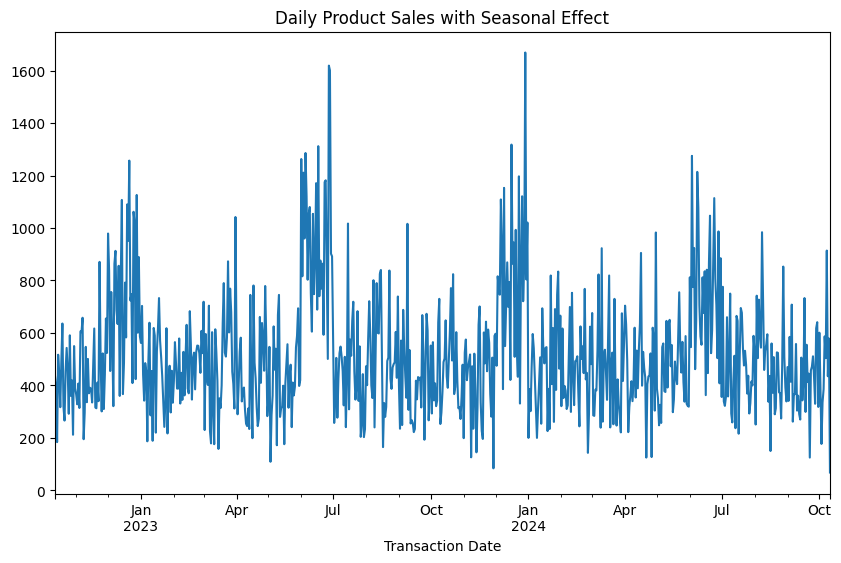

In [ ]:
import random
import datetime
import pandas as pd
import numpy as np

# Fungsi untuk generate tanggal acak dalam 2 tahun terakhir
def random_date(start, end):
    return start + datetime.timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

# Set rentang waktu 2 tahun
start_date = datetime.datetime.now() - datetime.timedelta(days=730)
end_date = datetime.datetime.now()

# Daftar produk yang harus ada setiap hari
daily_products = ["Tomat Tw Organik", "Kentang Dieng Natural", "Jeruk Medan",
                  "Pisang Mas", "Timun Lokal Organik", "Wortel Organik"]

# Fungsi musiman dengan dua amplitudo yang berulang
def irregular_amplitude(t):
    amplitude1 = 1 + 0.5 * np.sin(2 * np.pi * (t / 4))  # Amplitudo 1 (setiap 4 unit waktu)
    amplitude2 = 1 + 0.5 * np.sin(np.pi * (t / 3))      # Amplitudo 2 (setiap 3 unit waktu)
    return np.sin(t) * amplitude1 * amplitude2          # Menggabungkan keduanya

# Definisikan waktu sebagai linspace
t = np.linspace(0, 20, 10000)  # Buat 10000 titik waktu untuk transaksi

# Buat daftar transaksi
data = []
transaction_id = 1000  # mulai dari Transaction ID 1000

for i in range(10000):  # contoh buat 10.000 transaksi
    # Generate random tanggal dan jam antara 9 pagi sampai 10 malam
    transaction_date = random_date(start_date, end_date)
    transaction_time = random.randint(9, 22)  # antara jam 9 sampai 22
    transaction_date = transaction_date.replace(hour=transaction_time, minute=random.randint(0, 59), second=random.randint(0, 59))

    # Pilih produk secara acak yang dibeli
    products = ["Product A", "Product B", "Product C", "Product D", "Product E",
                "Product F", "Product G", "Product H", "Product I"]  # Assuming these are other products
    product_purchased = random.sample(products, random.randint(1, 9))  # setiap transaksi bisa beli 1-9 produk

    # Tambahkan kuantitas untuk setiap produk, dengan pengaruh musiman
    seasonal_factor = irregular_amplitude(t[i])  # Ambil faktor musiman berdasarkan waktu transaksi
    for product in product_purchased:
        if transaction_date.month in [6, 12]:  # Cek jika transaksi terjadi di bulan Juni atau Desember
            base_quantity = random.randint(5, 15)  # Jumlah produk lebih tinggi di bulan ini
        else:
            base_quantity = random.randint(1, 10)  # Jumlah normal di bulan lainnya

        # Sesuaikan kuantitas dengan faktor musiman
        quantity = int(base_quantity * (1 + seasonal_factor))

        data.append([transaction_id, transaction_date, product, max(1, quantity)])  # Minimal kuantitas 1

    transaction_id += 1

# Menambahkan transaksi khusus untuk setiap hari
date_range = pd.date_range(start=start_date, end=end_date)
for date in date_range:
    transaction_date = date.replace(hour=random.randint(9, 22), minute=random.randint(0, 59), second=random.randint(0, 59))
    transaction_id += 1  # Tambah transaction ID untuk setiap hari
    for product in daily_products:
        quantity = random.randint(1, 5)  # Kuantitas antara 1 dan 5 untuk setiap produk khusus
        data.append([transaction_id, transaction_date, product, quantity])

# Convert ke DataFrame
df = pd.DataFrame(data, columns=["Transaction ID", "Transaction Date", "Product Purchased", "Quantity"])

# Tampilkan beberapa baris contoh
print(df.head())

# Tambahkan kolom 'Transaction Date' sebagai indeks untuk analisis time series
df.set_index('Transaction Date', inplace=True)

# Resample data berdasarkan hari untuk menghitung total quantity yang dibeli setiap hari
daily_sales = df.resample('D').sum()['Quantity']

# Plot data time series untuk jumlah produk yang dibeli harian
daily_sales.plot(title="Daily Product Sales with Seasonal Effect", figsize=(10, 6))
plt.show()


   Transaction ID           Transaction Date      Product Purchased  Quantity
0            1000 2023-01-24 09:48:10.144806      Pisang Raja Sereh         8
1            1000 2023-01-24 09:48:10.144806        Jambu Air Citra         7
2            1000 2023-01-24 09:48:10.144806  Kiwi Nz Sungold Punet         9
3            1000 2023-01-24 09:48:10.144806        Kiwi Green Pack         1
4            1000 2023-01-24 09:48:10.144806   Baby Aragula Organic         2


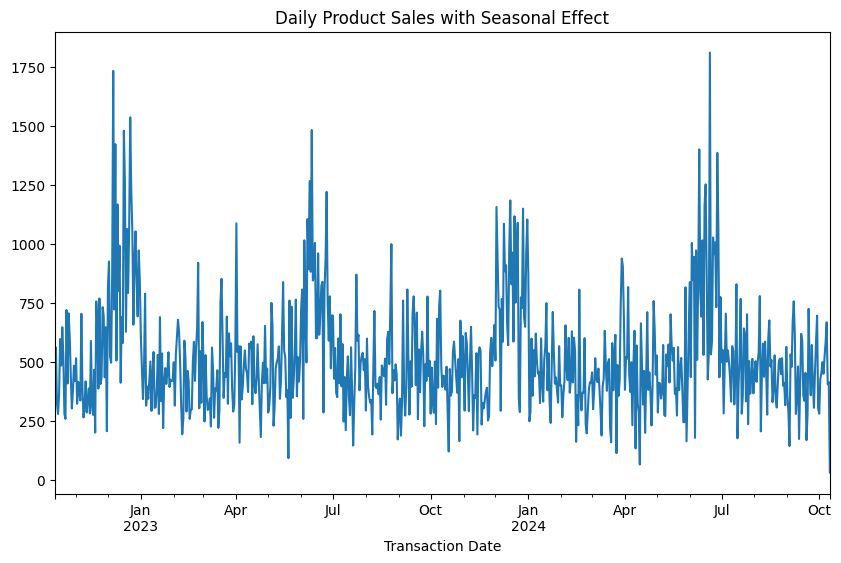

In [ ]:
import random
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Function to generate a random date within the last two years
def random_date(start, end):
    return start + datetime.timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

# Set the date range for the last two years
start_date = datetime.datetime.now() - datetime.timedelta(days=730)
end_date = datetime.datetime.now()

# List of products that should be purchased every day
daily_products = ["Tomat Tw Organik", "Kentang Dieng Natural", "Jeruk Medan",
                  "Pisang Mas", "Timun Lokal Organik", "Wortel Organik"]

# Full list of products (example list provided earlier)
products_name = ['Aiko Melon Premium',
 'All Seasons Raspberry',
 'Alpukat Mentega Premium',
 'Alpukat Mentega Super',
 'Anggur Autum Crisps Hijau Peru',
 'Anggur Black Autumn',
 'Anggur Black Globe',
 'Anggur Black Sapphire',
 'Anggur Candy Snape',
 'Anggur Delaware Korea',
 'Anggur Great Green',
 'Anggur Green Ivory',
 'Anggur Hijau Sweet Globe',
 'Anggur Hijau Thompson',
 'Anggur Kyoho Korea',
 'Anggur Midnight Beauty',
 'Anggur Red Globe',
 'Apel Ambrosia',
 'Apel Envy Usa',
 'Apel Fuji',
 'Apel Fuji Blush',
 'Apel Fuji New Zealand',
 'Apel Fuji Wangshan',
 'Apel Grand Smith',
 'Apel Pacifik Rose',
 'Apel Red Delicious',
 'Apel Rockit Nz Tube',
 'Apel Royal Gala',
 'Apel Sunfuji Jepang',
 'Apel Venus Wangshan',
 'Arugula Organik',
 'Asparagus Natural',
 'Asparagus Organik',
 'Baby Aragula Organic',
 'Baby Kale Organic',
 'Baby Pakcoy Organik',
 'Baby Spinach Organik',
 'Bayam Hijau Hydroponik',
 'Bayam Hijau Organik',
 'Bayam Merah Hydroponik',
 'Bayam Merah Organik',
 'Beet Organik',
 'Belimbing Dewi',
 'Belimbing Organik',
 'Best Value Wortel Organik',
 'Blewah',
 'Blueberry Import Gr',
 'Brokoli Organik',
 'Brussel Sprouts Biji Benih',
 'Buah Delima Import',
 'Buah Fig Ara Tin',
 'Buah Naga Merah',
 'Buah Naga Putih',
 'Buah Semangka Merah Biji',
 'Buncis Baby Organik',
 'Buncis Lokal Organik',
 'Butter Baby Cos Organic',
 'Butternut Pumpkin Organik',
 'Caisim Hydroponik',
 'Celebrations Strawberry',
 'Cherry',
 'Cuciwis Organik',
 'Dalion Melon Premium',
 'Daun Basil Organik',
 'Daun Dill Organik',
 'Daun Katuk',
 'Daun Kenikir Hia Organik',
 'Daun Mint Organik',
 'Daun Sage Organik',
 'Driscolls Strawberry Longstem USA',
 'Edamame',
 'Edatsuki',
 'Endive Organik',
 'First Taste Talas Kupas Potong',
 'Fresharvest Tomat Cherry Merah Natural Pouch',
 'Highland Baby Spinach',
 'Highland Capsicum Baby',
 'Highland Cherry Tomato',
 'Highland Cherry Trust Tomato',
 'Highland Gourmet Tomato',
 'Horenso Organik',
 'Jagung Hokaido',
 'Jagung Ketan Merah',
 'Jagung Manis Organik',
 'Jambu Air Citra',
 'Jambu Biji Merah',
 'Jambu Crystal Putih',
 'Jeruk Afourer Australia',
 'Jeruk Baby Pacitan',
 'Jeruk Bali Madu Kupas Pcs',
 'Jeruk Dekopon',
 'Jeruk Gerga',
 'Jeruk Honey Murcot',
 'Jeruk Keprok Super',
 'Jeruk Kino Pakistan',
 'Jeruk Limo Organik',
 'Jeruk Medan',
 'Jeruk Navel',
 'Jeruk Nipis Organik',
 'Jeruk Santang Daun',
 'Jeruk Siam',
 'Jeruk Valencia',
 'Jeruk Wogan',
 'Kailan Hydroponic',
 'Kailan Organik',
 'Kale Daun Organik',
 'Kale Nero Organik',
 'Kangkung Hydroponic',
 'Kangkung Organik',
 'Kapri Organik',
 'Kedondong',
 'Kembang Kol Organik',
 'Kentang Dieng Natural',
 'Kentang Rendang Natural',
 'Kiwi Green Pack',
 'Kiwi Nz Sungold Punet',
 'Kiwi Redruby',
 'Kubis Merah Organik',
 'Kubis Organik',
 'Kurma Anggur Black Diamond',
 'Kurma Medjool USA Premium',
 'Kurma Palm Frutt',
 'Labu Parang Kupas',
 'Labu Siam Acar Organik',
 'Labu Siam Organik',
 'Lettuce Head Natural',
 'Lobak Organik',
 'Lotus Root',
 'Lychee',
 'Mangga Budiraja',
 'Mangga Gedong Gincu',
 'Mangga Harum Manis Super',
 'Mangga Indramayu',
 'Mangga Manalagi',
 'Manggis',
 'Markisa Madu',
 'Matoa',
 'Melon Marakaito',
 'Melon Rock',
 'Melon Saga',
 'Nanas Madu Kupas Pack',
 'Nanas Palembang',
 'Nangka Kupas Pack',
 'Okra Hijau Organik',
 'Organik Sawi Putih Petsai',
 'Oyong Organik',
 'Pakcoy Hydroponic',
 'Pakcoy Organik',
 'Palmyra Kurma Tangkai Premium Pack',
 'Paprika Hijau Natural',
 'Paprika Hijau Organik',
 'Paprika Hitam Natural',
 'Paprika Kuning Natural',
 'Paprika Kuning Organik',
 'Paprika Merah Natural',
 'Paprika Merah Organik',
 'Paprika Orange Natural',
 'Paprika Ungu Natural',
 'Pare Organik',
 'Peach Korea',
 'Peach White',
 'Pear Century',
 'Pear Golden',
 'Pear Packham',
 'Pear Singo',
 'Pear Singo Korea',
 'Pear Sweet',
 'Pear Xiang Lie',
 'Pepaya Bangkok',
 'Pepaya California',
 'Pepaya Muda Kupas',
 'Pete Kupas',
 'Pico Melon Premium',
 'Pisang Ambon Organik',
 'Pisang Barangan',
 'Pisang Kepok',
 'Pisang Lampung Organik',
 'Pisang Mas',
 'Pisang Raja Bulu',
 'Pisang Raja Sereh',
 'Pisang Tanduk',
 'Pisang Uli',
 'Pohpohan Organik',
 'Pucuk Labu Organik',
 'Red Radish Organik',
 'Salak Bali Gula Pasir',
 'Salak Pondoh Super',
 'Selada Daun Hijau Organik',
 'Selada Daun Merah Organik',
 'Seledri Stick Organik',
 'Semangka Merah Biji Baby Black',
 'Shiro Melon Premium',
 'Siomak Organik',
 'Sirsak',
 'Strawberry Korea',
 'Sunrise Diet Potato',
 'Sweet Potato',
 'Sweethearts Strawberry',
 'Tarragon Organik',
 'Terong Belanda Kg',
 'Terong Ungu Organik',
 'Timun Lokal Organik',
 'Timun Suri',
 'Tomat Beef Organik',
 'Tomat Cherry Organik',
 'Tomat Tw Natural',
 'Tomat Tw Organik',
 'Ubi Cilembu',
 'Ubi Jepang',
 'Ubi Ungu Kupas Potong',
 'Wortel Baby Organik',
 'Wortel Brastagi',
 'Wortel Organik',
 'Zukini Organik']

# Seasonal function with two recurring amplitudes
def irregular_amplitude(t):
    amplitude1 = 1 + 0.5 * np.sin(2 * np.pi * (t / 4))  # Amplitude 1 (every 4 units)
    amplitude2 = 1 + 0.5 * np.sin(np.pi * (t / 3))      # Amplitude 2 (every 3 units)
    return np.sin(t) * amplitude1 * amplitude2          # Combining both amplitudes

# Define time as linspace for seasonal effects
t = np.linspace(0, 20, 10000)  # Generate 10,000 time points for transactions

# Initialize an empty list to hold transaction data
data = []
transaction_id = 1000  # Starting from transaction ID 1000

# Generate random transactions
for i in range(10000):  # Example of creating 10,000 transactions
    # Generate a random date and time between 9 AM and 10 PM
    transaction_date = random_date(start_date, end_date)
    transaction_time = random.randint(9, 22)  # Between 9 AM and 10 PM
    transaction_date = transaction_date.replace(hour=transaction_time, minute=random.randint(0, 59), second=random.randint(0, 59))

    # Choose a random set of products for this transaction
    product_purchased = random.sample(products_name, random.randint(1, 9))  # Each transaction buys 1-9 products

    # Add quantity for each product with a seasonal effect
    seasonal_factor = irregular_amplitude(t[i])  # Get seasonal factor based on transaction time
    for product in product_purchased:
        if transaction_date.month in [6, 12]:  # Check if the transaction is in June or December
            base_quantity = random.randint(5, 15)  # Higher quantity during these months
        else:
            base_quantity = random.randint(1, 10)  # Normal quantity in other months

        # Adjust quantity with the seasonal factor
        quantity = int(base_quantity * (1 + seasonal_factor))
        data.append([transaction_id, transaction_date, product, max(1, quantity)])  # Minimum quantity of 1

    transaction_id += 1

# Ensure daily_products are purchased every day
date_range = pd.date_range(start=start_date, end=end_date)
for date in date_range:
    transaction_date = date.replace(hour=random.randint(9, 22), minute=random.randint(0, 59), second=random.randint(0, 59))
    transaction_id += 1  # Increment transaction ID for each day
    for product in daily_products:
        quantity = random.randint(1, 5)  # Quantity between 1 and 5 for the daily required products
        data.append([transaction_id, transaction_date, product, quantity])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Transaction ID", "Transaction Date", "Product Purchased", "Quantity"])

# Display a few rows as a sample
print(df.head())

# Set 'Transaction Date' as the index for time series analysis
df.set_index('Transaction Date', inplace=True)

# Resample data daily to calculate total quantity bought each day
daily_sales = df.resample('D').sum()['Quantity']

# Plot the time series data for the total daily quantity purchased
daily_sales.plot(title="Daily Product Sales with Seasonal Effect", figsize=(10, 6))
plt.show()


In [ ]:
# Reset the index to make 'Transaction Date' a column again
daily_sales = daily_sales.reset_index()

# Display the first few rows to confirm
print(daily_sales.head())


  Transaction Date  Quantity
0       2022-10-12       282
1       2022-10-13       561
2       2022-10-14       327
3       2022-10-15       280
4       2022-10-16       363


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54971 entries, 2023-04-14 22:57:18.269285 to 2024-10-11 15:13:40.269285
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Transaction ID     54971 non-null  int64 
 1   Product Purchased  54971 non-null  object
 2   Quantity           54971 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:
df.head(10)

,Transaction ID,Product Purchased,Quantity
Transaction Date,,,
2023-04-14 22:57:18.269285,1000,Peach White,9
2023-04-14 22:57:18.269285,1000,Horenso Organik,3
2023-04-14 22:57:18.269285,1000,Asparagus Organik,10
2024-09-01 11:57:34.269285,1001,Jeruk Nipis Organik,4
2024-09-01 11:57:34.269285,1001,Jeruk Limo Organik,5
2024-09-01 11:57:34.269285,1001,Melon Saga,3
2024-09-01 11:57:34.269285,1001,Semangka Merah Biji Baby Black,4
2024-09-01 11:57:34.269285,1001,Jeruk Dekopon,4
2024-09-01 11:57:34.269285,1001,Dalion Melon Premium,9


In [ ]:
daily_sales

,Quantity
Transaction Date,
2022-10-12,166
2022-10-13,499
2022-10-14,555
2022-10-15,540
2022-10-16,301
...,...
2024-10-07,717
2024-10-08,483
2024-10-09,291


In [ ]:
# Plot the time series data for the total daily quantity purchased
daily_sales.plot(title="Daily Product Sales with Seasonal Effect", figsize=(10, 6))
plt.show()

,Transaction ID,Product Purchased,Quantity
Transaction Date,,,
2023-04-14 22:57:18.269285,1000,Peach White,9
2023-04-14 22:57:18.269285,1000,Horenso Organik,3
2023-04-14 22:57:18.269285,1000,Asparagus Organik,10
2024-09-01 11:57:34.269285,1001,Jeruk Nipis Organik,4
2024-09-01 11:57:34.269285,1001,Jeruk Limo Organik,5
...,...,...,...
2024-10-11 15:13:40.269285,11731,Kentang Dieng Natural,3
2024-10-11 15:13:40.269285,11731,Jeruk Medan,5
2024-10-11 15:13:40.269285,11731,Pisang Mas,1


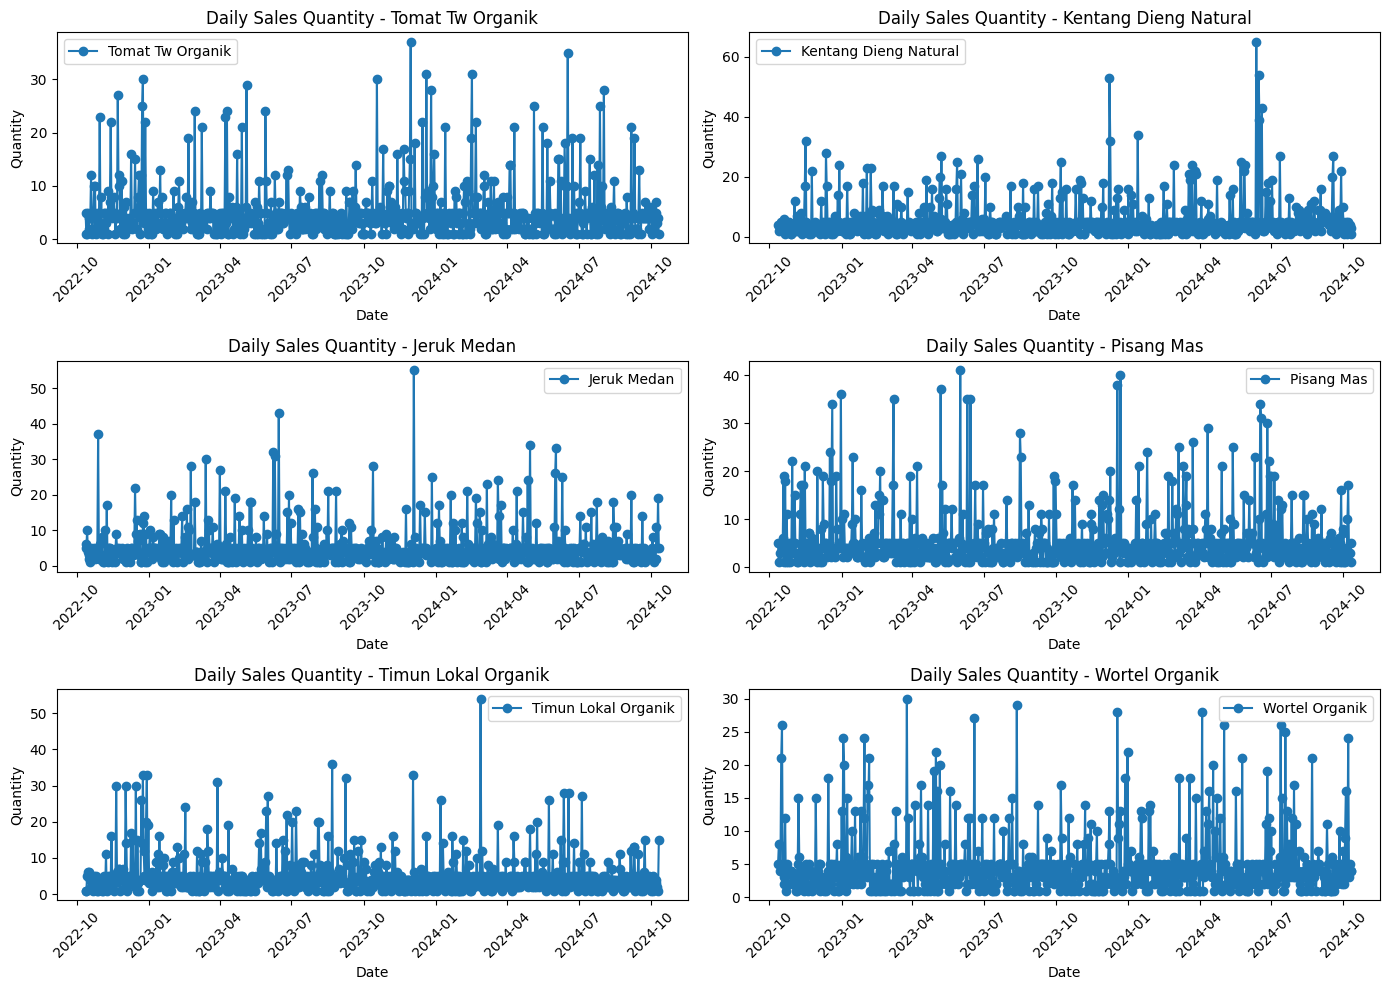

In [ ]:
# Group by date and product, then sum quantities
df_daily = df.groupby([df.index.date, 'Product Purchased']).sum()['Quantity']

# For each daily product, resample and plot
plt.figure(figsize=(14, 10))
for i, product in enumerate(daily_products, 1):
    # Extract data for the specific product
    product_daily = df_daily.xs(product, level='Product Purchased')

    # Plot each product on a separate subplot
    plt.subplot(3, 2, i)  # 3 rows, 2 columns layout
    plt.plot(product_daily.index, product_daily.values, marker='o', linestyle='-', label=product)
    plt.title(f'Daily Sales Quantity - {product}')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

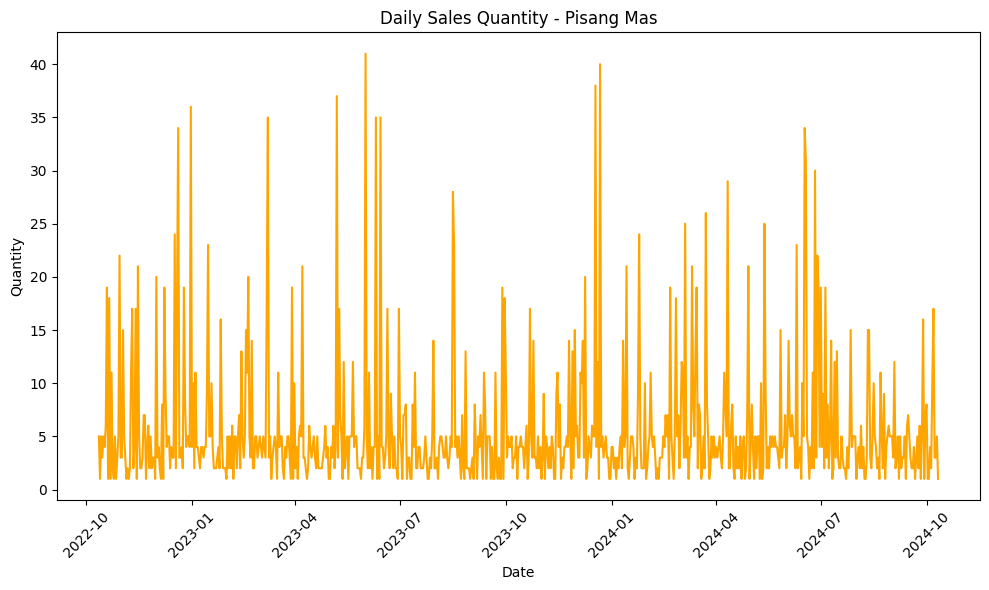

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a DateTimeIndex
# If not already done, ensure the DataFrame is set to use 'Transaction Date' as the index
# df.set_index('Transaction Date', inplace=True)

# Filter the DataFrame to show only data for "Pisang Mas"
pisang_mas_daily = df[df['Product Purchased'] == "Pisang Mas"].resample('D').sum()['Quantity']

# Plot the daily sales quantity for "Pisang Mas"
plt.figure(figsize=(10, 6))
plt.plot(pisang_mas_daily.index, pisang_mas_daily.values, linestyle='-', color='orange')
plt.title('Daily Sales Quantity - Pisang Mas')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
daily_sales

,Quantity
Transaction Date,
2022-10-12,166
2022-10-13,499
2022-10-14,555
2022-10-15,540
2022-10-16,301
...,...
2024-10-07,717
2024-10-08,483
2024-10-09,291


In [ ]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  731 non-null    datetime64[ns]
 1   Quantity          731 non-null    int64         
 2   Year              731 non-null    int32         
 3   Month             731 non-null    int32         
 4   Day               731 non-null    int32         
 5   Quarter           731 non-null    int32         
 6   year_sin          731 non-null    float64       
 7   year_cos          731 non-null    float64       
 8   month_sin         731 non-null    float64       
 9   month_cos         731 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(4), int64(1)
memory usage: 45.8 KB


In [ ]:
# Create time series features
daily_sales['Year'] = pd.to_datetime(daily_sales['Transaction Date']).dt.year
daily_sales['Month'] = pd.to_datetime(daily_sales['Transaction Date']).dt.month
daily_sales['Day'] = pd.to_datetime(daily_sales['Transaction Date']).dt.day
daily_sales['Quarter'] = pd.to_datetime(daily_sales['Transaction Date']).dt.quarter

# Add cyclical features for year and month
daily_sales['year_sin'] = np.sin(2 * np.pi * daily_sales['Year'] / 365.25)
daily_sales['year_cos'] = np.cos(2 * np.pi * daily_sales['Year'] / 365.25)
daily_sales['month_sin'] = np.sin(2 * np.pi * daily_sales['Month'] / 12)
daily_sales['month_cos'] = np.cos(2 * np.pi * daily_sales['Month'] / 12)

# Create lag features (lag 1, 2, 3)
daily_sales['Lag_1'] = daily_sales['Quantity'].shift(1)
daily_sales['Lag_2'] = daily_sales['Quantity'].shift(2)
daily_sales['Lag_3'] = daily_sales['Quantity'].shift(3)

daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  731 non-null    datetime64[ns]
 1   Quantity          731 non-null    int64         
 2   Year              731 non-null    int32         
 3   Month             731 non-null    int32         
 4   Day               731 non-null    int32         
 5   Quarter           731 non-null    int32         
 6   year_sin          731 non-null    float64       
 7   year_cos          731 non-null    float64       
 8   month_sin         731 non-null    float64       
 9   month_cos         731 non-null    float64       
 10  Lag_1             730 non-null    float64       
 11  Lag_2             729 non-null    float64       
 12  Lag_3             728 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int32(4), int64(1)
memory usage: 62.9 KB


In [ ]:
daily_sales.to_csv('daily_sales_data3.csv', index=True)